In [135]:
# preocessing 
# imports 
# checking values
# missing values
# tramgormates
# preparel for model

In [136]:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [137]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test2 = pd.read_csv('data/test.csv')
len_train = train.shape[0]
houses = pd.concat([train, test], sort=False)
print(train.shape, houses.shape)

(1460, 81) (2919, 81)


In [138]:
houses.select_dtypes(include='object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [139]:
houses.select_dtypes(include=['int', 'float']).head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0


In [140]:
houses.select_dtypes(include='object').isnull().sum()[houses.select_dtypes(include='object').isnull().sum()>0].tolist

<bound method IndexOpsMixin.tolist of MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64>

In [141]:
for col in ['Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')    

In [142]:
help(train['Alley'].mode)

Help on method mode in module pandas.core.series:

mode() method of pandas.core.series.Series instance
    Return the mode(s) of the dataset.
    
    Always returns Series even if only one value is returned.
    
    Returns
    -------
    modes : Series (sorted)



In [143]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    train[col]=train[col].fillna(train[col].mode()[0])
    test[col]=test[col].fillna(train[col].mode()[0])

In [144]:
houses.select_dtypes(include=['int','float']).isnull().sum()[houses.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [145]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0)

In [146]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(train['LotFrontage'].mean())


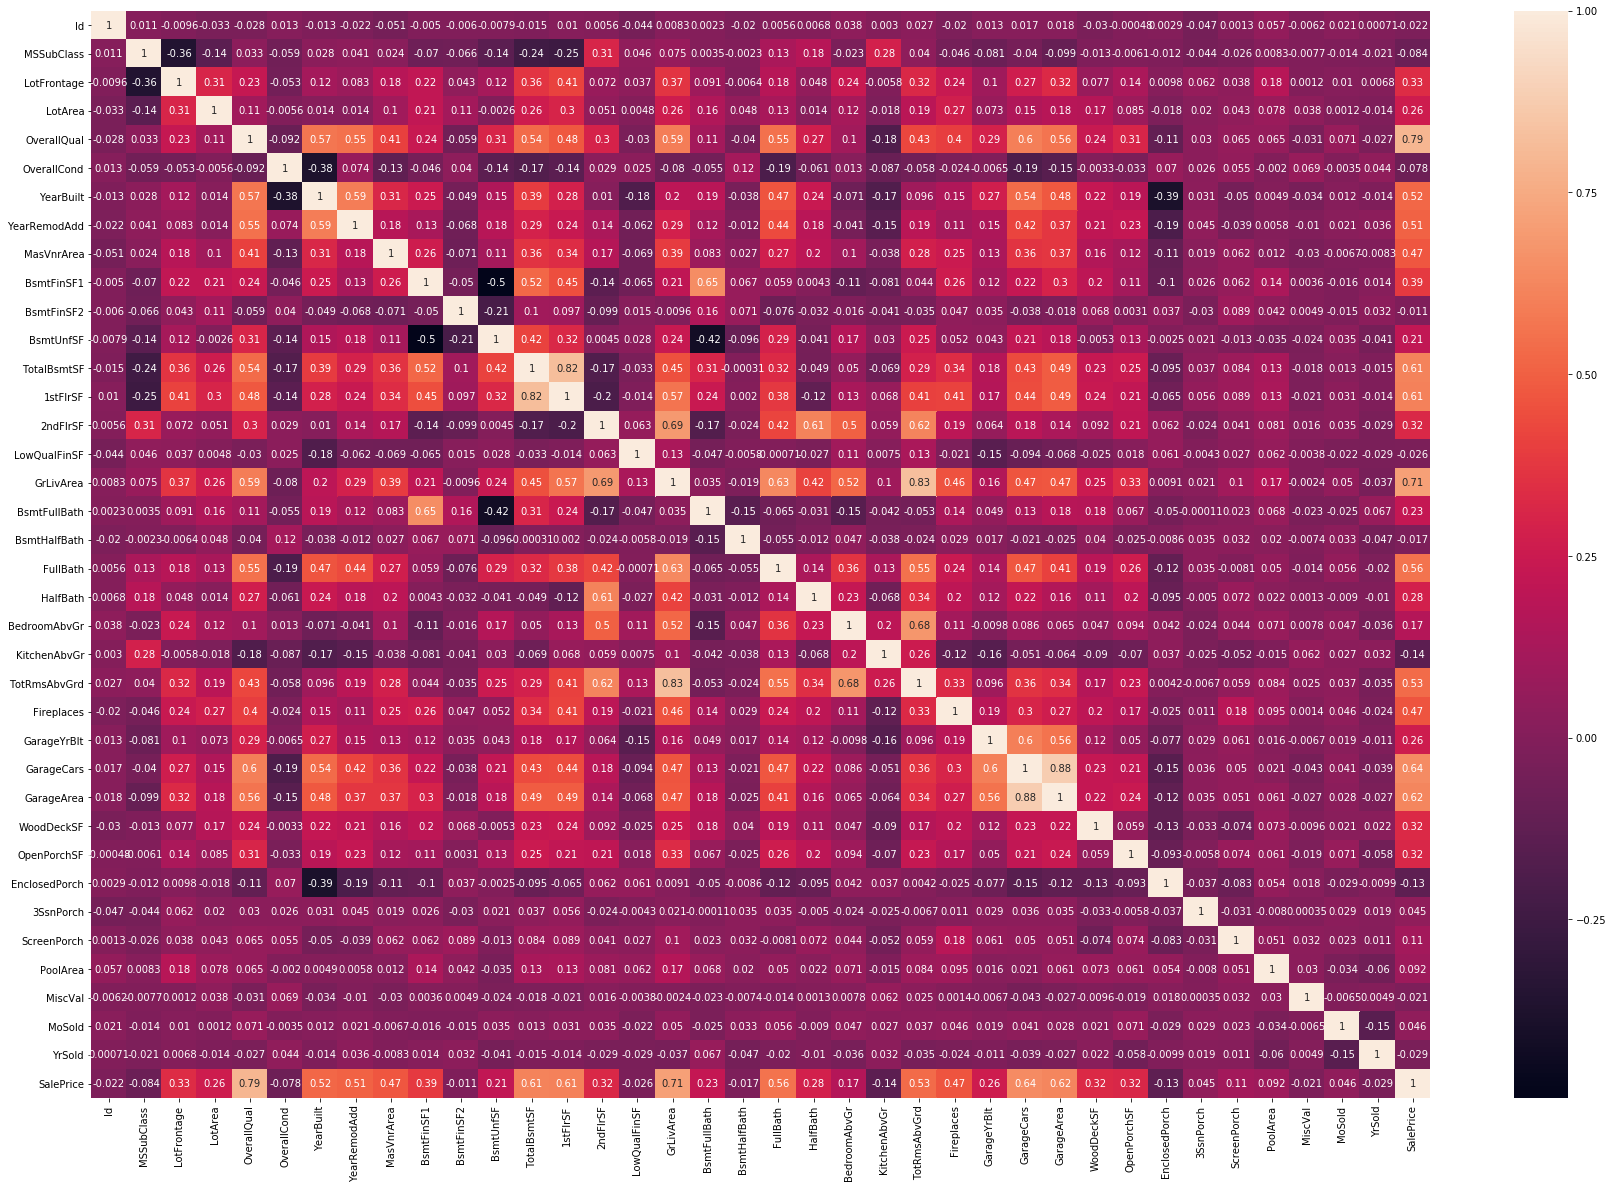

In [147]:
plt.figure(figsize=[30,20])
seaborn.heatmap(train.corr(), annot=True)

In [148]:
# removed less corr MSSubclass Overallcod BsmtfinSF2 LowQualFinSF 3Ssnporch MiscVal BsmthHalfBath
train.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch', 'MiscVal','BsmtHalfBath'], axis=1, inplace=True)
test.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch', 'MiscVal','BsmtHalfBath'], axis=1, inplace=True)

In [149]:
train = train[train['GrLivArea']<4000]

In [150]:
len_train = train.shape
len_train

(1456, 76)

In [151]:
houses = pd.concat([train, test], sort=False)

In [152]:
# tramsformations
houses['MSSubClass']=houses['MSSubClass'].astype(str)

In [153]:
train=houses[:len_train[0]]
test=houses[len_train[0]:]

In [154]:
from scipy.stats import skew
from scipy.special import boxcox1p
lam=0.1
for col in ('PoolArea', 'LotArea',
       'KitchenAbvGr',  'EnclosedPorch', 'ScreenPorch',
        'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'BsmtFullBath', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'):
    train[col]=boxcox1p(train[col],lam)
    test[col]=boxcox1p(test[col],lam)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [155]:
train['SalePrice'] = np.log(train['SalePrice'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
houses = pd.concat([train, test], sort=False)
houses = pd.get_dummies(houses)
len_train = train.shape[0]
train= houses[:len_train]
test = houses[len_train:]
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [157]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
test = test.drop('SalePrice',axis=1)

In [159]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
sc.fit(X)
X = sc.transform(X)
test = sc.transform(test)

In [160]:
train.isna().sum().sum()

0

In [161]:
#model

In [162]:
#model

In [163]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.001, random_state=1)
model.fit(X, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
pred = model.predict(test)
output = np.exp(pred)

In [165]:
output_data = pd.DataFrame({'Id':test2.Id, 'SalePrice':output})
output_data.to_csv('submission1.csv',index=False)
output_data.head()

,Id,SalePrice
0,1461,122654.068560
1,1462,155093.996667
2,1463,180817.195294
3,1464,198927.920769
4,1465,193582.691376


In [166]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


In [167]:
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state=90)

In [176]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
dtr.predict(test)[:5]


array([11.76368418, 11.91839057, 12.15477935, 12.07254125, 12.27139211])

In [177]:
# help(GridSearchCV)

In [178]:
# help(RandomForestRegressor)

In [179]:
# rfr = RandomForestRegressor()
# params = {'n_estimators':[10,20,30,50,60,100]}
# gcv = GridSearchCV(rfr, param_grid=params, cv=5)
# gcv.fit(X_train,y_train)
# gcv.best_params_ 

In [180]:
ada = AdaBoostRegressor(n_estimators=30)
bag = BaggingRegressor(n_estimators=50)
lasso = Lasso()
lr = LinearRegression()
sgd = SGDRegressor()
svr = SVR()
rfr= RandomForestRegressor(n_estimators=100)

In [181]:
# for name,es in {'DecisionTreeRegressor':dtr, 'RandomForestRegressor':rfr, 'AdaBoostRegressor':ada,'BaggingRegressor':bag, 
#            "Lasso":lasso, 'LinearRegression':lr, "SGDRegressor":sgd, "SVR":svr}.items():
#     es.fit(X_train,y_train)

In [182]:
# 均值
# y_results = pd.DataFrame()
# for name,es in {'DecisionTreeRegressor':dtr, 'RandomForestRegressor':rfr, 'AdaBoostRegressor':ada,'BaggingRegressor':bag, 
#            "Lasso":lasso, 'LinearRegression':lr, "SGDRegressor":sgd, "SVR":svr}.items():
#     y_results[name]=es.predict(X_test)
# y_results.head()
# y_results.drop('SGDRegressor',axis=1)

In [183]:
# print(mean_squared_error(y_results.mean(axis=1), y_test))


In [184]:


# result = pd.DataFrame({"Id":test2.Id,'SalePrice':y_results.mean(axis=1))
# result.to_csv('Submission2.csv',index=False)

In [185]:
dtr.predict(X_test)[:5]

array([12.32385568, 12.31043266, 11.8277362 , 12.20607265, 12.3779229 ])

In [195]:
# 均值-实例测试
y_results = pd.DataFrame()
for name,es in {'DecisionTreeRegressor':dtr, 'RandomForestRegressor':rfr, 'AdaBoostRegressor':ada,'BaggingRegressor':bag, 
           "Lasso":lasso, 'LinearRegression':lr, "SGDRegressor":sgd, "SVR":svr}.items():
    es.fit(X, y)
y_results.head()

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


""


In [198]:
# 均值-实例测试
y_results = pd.DataFrame()
for name,es in {'DecisionTreeRegressor':dtr, 'RandomForestRegressor':rfr, 'AdaBoostRegressor':ada,'BaggingRegressor':bag, 
           "Lasso":lasso, 'LinearRegression':lr, "SVR":svr}.items():
    y_results[name]=es.predict(test)
y_results.head()

,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,Lasso,LinearRegression,SVR
0,11.755872,11.756083,11.623586,11.738652,12.048512,11.710378,11.719427
1,11.918391,11.953963,11.711428,11.936492,12.048370,12.016333,11.956084
2,12.165251,12.059407,11.999958,12.079142,12.050194,12.153646,12.131298
3,12.061047,12.104946,12.058925,12.095871,12.050241,12.212530,12.202208
4,12.190959,12.225897,12.125723,12.176685,12.049962,12.202209,12.147262


In [199]:
output = np.exp(y_results.mean(axis=1))
result = pd.DataFrame({'Id':test2.Id, 'SalePrice':output})
result.to_csv('Submission3.csv',index=False)